In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#### Load data: 

In [2]:
file_path = 'data.xlsx'
xls = pd.ExcelFile(file_path)

print(xls.sheet_names)



['User Data', 'Property Data']


In [3]:
user_df = xls.parse('User Data')
property_df = xls.parse('Property Data')

user_df.sample(2)

,User ID,Budget,Bedrooms,Bathrooms,Qualitative Description
5,6,$600k,4,3,"""I’m looking for a luxurious home where I can ..."
18,19,$400k,3,2,"""I’d love a home with a lake view and a cozy f..."


In [4]:
property_df.sample(2)

,Property ID,Price,Bedrooms,Bathrooms,Living Area (sq ft),Qualitative Description
16,17,$250k,4,3,3801,"For those who appreciate vintage charm, this h..."
19,20,$500k,3,3,1884,Adventure awaits at this ski-in/ski-out mounta...


In [5]:
# user_df.info()
property_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Property ID              30 non-null     int64 
 1   Price                    30 non-null     object
 2   Bedrooms                 30 non-null     int64 
 3   Bathrooms                30 non-null     int64 
 4   Living Area (sq ft)      30 non-null     int64 
 5   Qualitative Description  30 non-null     object
dtypes: int64(4), object(2)
memory usage: 1.5+ KB


#### Preprocessing 

In [6]:
# removing dollar sign and k 
def convert_money_string(value):
    if(isinstance(value, str)):
        value = value.strip().replace('$', '').lower()
        if('k' in  value):
            return float(value.replace('k', ''))*1_000
        else:
            try:
                return float(value.replace(',', ''))
            except : 
                return None
    
    return value


In [7]:
user_df['Budget'] = user_df['Budget'].apply(convert_money_string)
property_df['Price'] = property_df['Price'].apply(convert_money_string)

In [8]:
user_df['Budget'].info()
property_df['Price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 25 entries, 0 to 24
Series name: Budget
Non-Null Count  Dtype  
--------------  -----  
25 non-null     float64
dtypes: float64(1)
memory usage: 328.0 bytes
<class 'pandas.core.series.Series'>
RangeIndex: 30 entries, 0 to 29
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
30 non-null     float64
dtypes: float64(1)
memory usage: 368.0 bytes


In [9]:
user_df['Budget'] = pd.to_numeric(user_df['Budget'], errors='coerce')
property_df['Price'] = pd.to_numeric(property_df['Price'], errors='coerce')

In [10]:
user_df['Budget'].info()
property_df['Price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 25 entries, 0 to 24
Series name: Budget
Non-Null Count  Dtype  
--------------  -----  
25 non-null     float64
dtypes: float64(1)
memory usage: 328.0 bytes
<class 'pandas.core.series.Series'>
RangeIndex: 30 entries, 0 to 29
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
30 non-null     float64
dtypes: float64(1)
memory usage: 368.0 bytes


In [11]:
#rename cols 
property_df = property_df.rename(columns={
    'Property ID' : 'PropertyId',
    'Living Area (sq ft)' : 'LivingArea',
    'Qualitative Description' : 'PropertyDesc'
})

user_df = user_df.rename(columns={
    'User ID' : 'UserId',
    'Qualitative Description' : 'UserDesc'
})



In [12]:
user_df.columns
# property_df.columns

Index(['UserId', 'Budget', 'Bedrooms', 'Bathrooms', 'UserDesc'], dtype='object')

In [13]:
#find if null 
print("User df null : ",  user_df.isnull().sum())
print("property df null : ",  property_df.isnull().sum())

User df null :  UserId       0
Budget       0
Bedrooms     0
Bathrooms    0
UserDesc     0
dtype: int64
property df null :  PropertyId      0
Price           0
Bedrooms        0
Bathrooms       0
LivingArea      0
PropertyDesc    0
dtype: int64


In [14]:
#duplicates 
print("User df dups : ",  user_df.duplicated().sum())
print("property df dups : ",  property_df.duplicated().sum())

User df dups :  0
property df dups :  0


In [15]:
user_df.describe()


,UserId,Budget,Bedrooms,Bathrooms
count,25.000000,25.000000,25.000000,25.000000
mean,13.000000,456000.000000,3.120000,2.160000
std,7.359801,156338.308379,0.971253,0.943398
min,1.000000,200000.000000,2.000000,1.000000
25%,7.000000,350000.000000,2.000000,1.000000
50%,13.000000,450000.000000,3.000000,2.000000
75%,19.000000,550000.000000,4.000000,3.000000
max,25.000000,800000.000000,5.000000,4.000000


In [16]:
property_df.describe()

,PropertyId,Price,Bedrooms,Bathrooms,LivingArea
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,536666.666667,3.433333,2.166667,2589.300000
std,8.803408,213320.761124,1.406471,1.085431,965.264664
min,1.000000,250000.000000,1.000000,1.000000,936.000000
25%,8.250000,300000.000000,2.000000,1.000000,1872.500000
50%,15.500000,550000.000000,4.000000,2.000000,2745.000000
75%,22.750000,775000.000000,4.750000,3.000000,3361.000000
max,30.000000,800000.000000,5.000000,4.000000,3993.000000


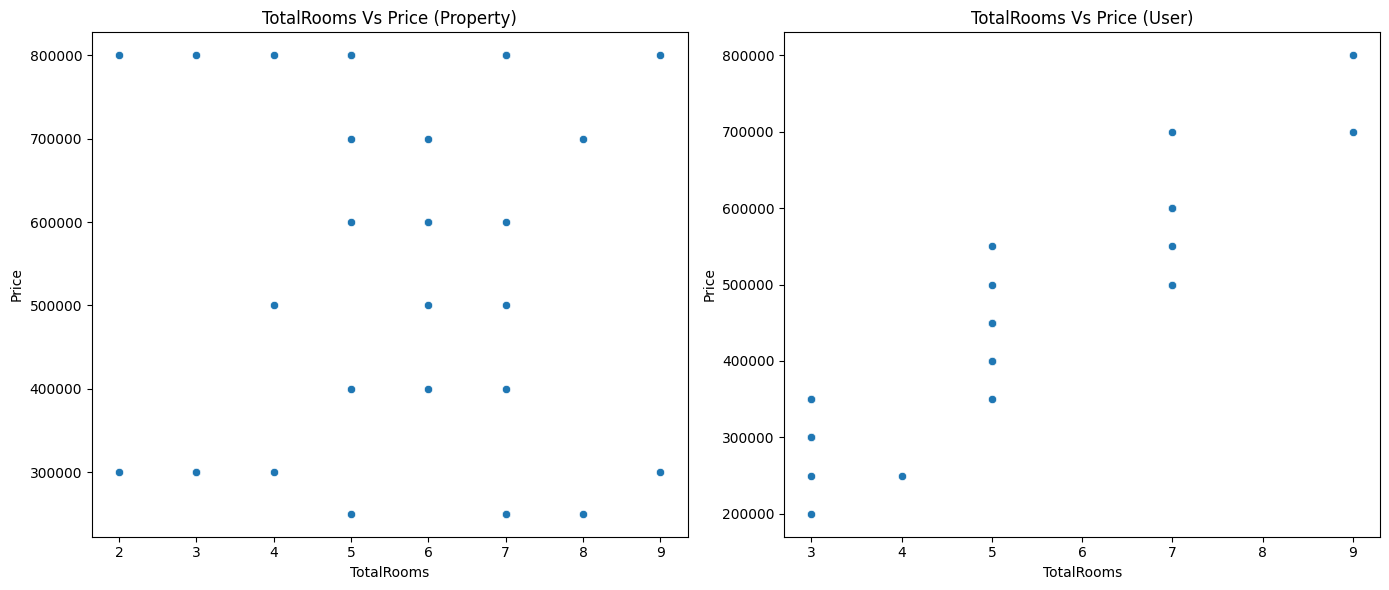

In [17]:
# finding relationship between total_rooms and price in propery 
fig, axes = plt.subplots(1, 2, figsize = (14,6))

sns.scatterplot(x = property_df['Bathrooms'] + property_df['Bedrooms'], y = property_df['Price'], ax = axes[0])
axes[0].set_title('TotalRooms Vs Price (Property)')
axes[0].set_xlabel('TotalRooms')
axes[0].set_ylabel('Price')

sns.scatterplot(x = user_df['Bathrooms'] + user_df['Bedrooms'], y = user_df['Budget'], ax = axes[1])
axes[1].set_title('TotalRooms Vs Price (User)')
axes[1].set_xlabel('TotalRooms')
axes[1].set_ylabel('Price')

plt.tight_layout()
plt.show()

In [18]:
(user_df.shape, property_df.shape)

((25, 5), (30, 6))

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')


c:\Users\yeole\Desktop\case-study-2\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
user_df['UserDescEmbedding'] = user_df['UserDesc'].apply(lambda x : model.encode(x))
property_df['PropertyDescEmbedding'] = property_df['PropertyDesc'].apply(lambda x : model.encode(x))


In [21]:
user_df['UserDescEmbedding'].head(3)

0    [0.05786801, 0.088496365, 0.04759461, 0.016239...
1    [0.061499935, 0.047761843, 0.06053698, 0.11264...
2    [0.07994517, 0.048485532, 0.020362388, 0.06166...
Name: UserDescEmbedding, dtype: object

In [22]:
property_df['PropertyDescEmbedding'].head(3)


0    [0.034886625, 0.045282524, 0.0004963008, 0.073...
1    [0.07131635, 0.078971215, 0.01839154, -0.00641...
2    [0.07134424, 0.017568253, 0.06867664, 0.054248...
Name: PropertyDescEmbedding, dtype: object

In [23]:
len(property_df['PropertyDescEmbedding'][0])

384

In [24]:
user_df['UserDescEmbedding'][0].shape

(384,)

In [25]:
user_df['UserDescEmbedding'].shape

(25,)

In [26]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UserId             25 non-null     int64  
 1   Budget             25 non-null     float64
 2   Bedrooms           25 non-null     int64  
 3   Bathrooms          25 non-null     int64  
 4   UserDesc           25 non-null     object 
 5   UserDescEmbedding  25 non-null     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 1.3+ KB


In [27]:
property_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PropertyId             30 non-null     int64  
 1   Price                  30 non-null     float64
 2   Bedrooms               30 non-null     int64  
 3   Bathrooms              30 non-null     int64  
 4   LivingArea             30 non-null     int64  
 5   PropertyDesc           30 non-null     object 
 6   PropertyDescEmbedding  30 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 1.8+ KB


In [28]:
#scaling nnumerical values 
from sklearn.preprocessing import MinMaxScaler

user_df['Price'] = 0
user_df['LivingArea'] = 0
property_df['Budget'] = 0
num_cols = ['Budget', 'Price', 'LivingArea', 'Bedrooms', 'Bathrooms']
# num_cols_property = ['Budget', 'Price', 'LivingArea', 'Bedrooms', 'Bathrooms']



scaler = MinMaxScaler()
# property_scaler = MinMaxScaler()

user_df[num_cols] = scaler.fit_transform(user_df[num_cols])
property_df[num_cols] = scaler.transform(property_df[num_cols])


In [29]:
user_df.describe()

,UserId,Budget,Bedrooms,Bathrooms,Price,LivingArea
count,25.000000,25.000000,25.000000,25.000000,25.0,25.0
mean,13.000000,0.426667,0.373333,0.386667,0.0,0.0
std,7.359801,0.260564,0.323751,0.314466,0.0,0.0
min,1.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,7.000000,0.250000,0.000000,0.000000,0.0,0.0
50%,13.000000,0.416667,0.333333,0.333333,0.0,0.0
75%,19.000000,0.583333,0.666667,0.666667,0.0,0.0
max,25.000000,1.000000,1.000000,1.000000,0.0,0.0


In [30]:
property_df.describe()

,PropertyId,Price,Bedrooms,Bathrooms,LivingArea,Budget
count,30.000000,30.000000,30.000000,30.000000,30.000000,3.000000e+01
mean,15.500000,536666.666667,0.477778,0.388889,2589.300000,-3.333333e-01
std,8.803408,213320.761124,0.468824,0.361810,965.264664,1.129203e-16
min,1.000000,250000.000000,-0.333333,0.000000,936.000000,-3.333333e-01
25%,8.250000,300000.000000,0.000000,0.000000,1872.500000,-3.333333e-01
50%,15.500000,550000.000000,0.666667,0.333333,2745.000000,-3.333333e-01
75%,22.750000,775000.000000,0.916667,0.666667,3361.000000,-3.333333e-01
max,30.000000,800000.000000,1.000000,1.000000,3993.000000,-3.333333e-01


In [31]:
# #calculate cosine similarity 
# from sklearn.metrics.pairwise import cosine_similarity

# numerical_similarity = cosine_similarity(user_df[num_cols], property_df[num_cols])

# description_similarity = cosine_similarity(
#     list(user_df['UserDescEmbedding']),
#     list(property_df['PropertyDescEmbedding'])
# )

# match_scores = 0.5 * numerical_similarity + 0.5*description_similarity


# from sklearn.metrics.pairwise import cosine_similarity
# import numpy as np

# # Step 1: Calculate Cosine Similarity for Numerical Data (users vs properties)
# numerical_similarity = cosine_similarity(user_df[num_cols], property_df[num_cols])

# # Step 2: Calculate Cosine Similarity for Text Descriptions (users vs properties)
# description_similarity = cosine_similarity(
#     list(user_df['UserDescEmbedding']),
#     list(property_df['PropertyDescEmbedding'])
# )

# # Step 3: Combine both similarities (weighting can be adjusted as needed)
# match_scores = 0.5 * numerical_similarity + 0.5 * description_similarity

# # Example: Get the match score between the first user and the first property
# print(match_scores[0, 0])


In [32]:
property_df.sample(2)

,PropertyId,Price,Bedrooms,Bathrooms,LivingArea,PropertyDesc,PropertyDescEmbedding,Budget
21,22,400000.0,1.000000,0.0,2227.0,"A sanctuary in the city, this modern home feat...","[0.03647153, 0.074912176, -0.025021445, 0.0021...",-0.333333
13,14,500000.0,0.333333,0.0,1198.0,This sun-drenched penthouse boasts a wraparoun...,"[0.008598341, 0.0076094456, 0.034203894, 0.042...",-0.333333


In [33]:
user_df.sample(2)

,UserId,Budget,Bedrooms,Bathrooms,UserDesc,UserDescEmbedding,Price,LivingArea
3,4,0.083333,0.000000,0.333333,"""I need a stylish, open-concept home for my gr...","[0.03644111, 0.011416617, -0.0069035375, 0.076...",0.0,0.0
0,1,0.500000,0.333333,0.333333,"""I’ve always dreamed of a modern apartment in ...","[0.05786801, 0.088496365, 0.04759461, 0.016239...",0.0,0.0


In [34]:
user_df.drop(columns=['Price', 'LivingArea'], inplace= True)
user_df.sample(2)

,UserId,Budget,Bedrooms,Bathrooms,UserDesc,UserDescEmbedding
15,16,0.666667,0.666667,0.666667,"""I want a historic home in a walkable neighbor...","[0.07489115, 0.02231046, -0.014202434, 0.01342..."
22,23,0.583333,0.666667,0.666667,"""Dreaming of a home with mountain views and ea...","[-0.024464078, 0.039763056, 0.06479746, 0.0367..."


In [35]:
# property_df.drop(columns=['Budget'], inplace=True)
property_df.sample(2)

,PropertyId,Price,Bedrooms,Bathrooms,LivingArea,PropertyDesc,PropertyDescEmbedding,Budget
29,30,500000.0,0.666667,0.666667,3184.0,"A hidden gem nestled among towering oak trees,...","[0.034886625, 0.045282524, 0.0004963008, 0.073...",-0.333333
24,25,800000.0,-0.333333,0.333333,2822.0,"Smart, stylish, and sustainableâ€”this eco-fri...","[-0.022939648, 0.045372877, 0.04868523, 0.0220...",-0.333333


In [36]:
#calculate simimlarity based on common columns only 

from sklearn.metrics.pairwise import cosine_similarity

numerical_similarity = cosine_similarity(
    user_df[['Bedrooms', 'Bathrooms']],
    property_df[['Bedrooms', 'Bathrooms']]
)


In [37]:
numerical_similarity.shape

(25, 30)

In [38]:
#descriptions simi
# user_df['UserDescEmbedding'][0]

# user_embeddings = np.vstack(user_df['UserDescEmbedding'].values)
# property_embeddings = np.vstack(property_df['PropertyDescEmbedding'].values)

# descriptive_similarity = cosine_similarity(user_embeddings, property_embeddings)
print(user_df['UserDescEmbedding'].shape)
print(property_df['PropertyDescEmbedding'].shape)

print(user_df['UserDescEmbedding'])
print(property_df['PropertyDescEmbedding'])





(25,)
(30,)
0     [0.05786801, 0.088496365, 0.04759461, 0.016239...
1     [0.061499935, 0.047761843, 0.06053698, 0.11264...
2     [0.07994517, 0.048485532, 0.020362388, 0.06166...
3     [0.03644111, 0.011416617, -0.0069035375, 0.076...
4     [0.069856904, 0.036753714, 0.04169739, -0.0070...
5     [0.09159423, -0.00031604237, 0.023634503, 0.03...
6     [0.009234036, 0.07320262, 0.030344453, 0.04341...
7     [0.10985628, 0.013174006, 0.03633388, 0.016529...
8     [-0.060269296, 0.051723313, 0.04371966, 0.0592...
9     [0.08273484, 0.01886654, 0.027376497, 0.123669...
10    [0.052466765, 0.035616517, 0.02128945, 0.01469...
11    [0.06972524, 0.022604853, 0.0035510424, 0.0864...
12    [0.013514937, 0.013158664, 0.009605994, 0.0040...
13    [0.069857486, 0.046649005, -0.014830438, 0.045...
14    [0.06579095, 0.0010172985, 0.004573691, 0.0705...
15    [0.07489115, 0.02231046, -0.014202434, 0.01342...
16    [0.049794067, 0.02665052, -0.008221134, 0.0545...
17    [0.016691295, 0.0016497673, 0.

In [40]:
print(user_df['UserDescEmbedding'].shape)
print(user_df['UserDescEmbedding'][0].shape)
print(property_df['PropertyDescEmbedding'].shape)
print(property_df['PropertyDescEmbedding'][0].shape)

(25,)
(384,)
(30,)
(384,)


In [43]:
# convert user_embeddings to  2-d format :
user_embeddings = np.vstack([np.array(emb) for emb in user_df['UserDescEmbedding']])
property_embeddings = np.vstack([np.array(emb) for emb in property_df['PropertyDescEmbedding']])


In [44]:

print(user_embeddings.shape)
print(property_embeddings.shape)

(25, 384)
(30, 384)


In [45]:
# text similarity 
description_similarity  = cosine_similarity(user_embeddings, property_embeddings)

In [46]:
description_similarity.shape

(25, 30)

In [48]:
#budget 
#calculate budget match and penalize the budget which are higher over budget ones
# budget_match = np.zeros((len(user_df), len(property_df)))
# for i, user_budget in  enumerate(user_df['Budget']):
#     for j , property_price in enumerate(property_df['Price']):
#         # if withtin bufget give full score 
#         if property_price <= user_budget:
#             budget_match[i,j] = 1.0
#         else:
#             #penaltu = percenatge over bufdget
#             overBudget_ratio = property_price / user_budget
#             budget_match[i,j] = max(0, 1 - (overBudget_ratio-1)/2 ) #lienar decay
        

# budget and price are normalixed they may ahve zeros -> dividion by zero  

budget_match = np.zeros((len(user_df), len(property_df)))
for i, user_budget in  enumerate(user_df['Budget']):
    for j , property_price in enumerate(property_df['Price']):
        if user_budget == 0:
            #minm budget can only afford minm price proerty 
            if property_price == 0 :
                budget_match[i,j] = 1.0
            else:
                budget_match[i,j] = 0.0
        else:
            # if withtin bufget give full score 
            if property_price <= user_budget:
                budget_match[i,j] = 1.0
            else:
                #penaltu = percenatge over bufdget
                overBudget_ratio = property_price / user_budget
                budget_match[i,j] = max(0, 1 - (overBudget_ratio-1)/2 ) #lienar decay
            
            
 


In [51]:
budget_match.shape

(25, 30)

In [81]:
#combine factotrs : 
match_weights = {
    'numerical' : 0.4,
    'description' : 0.4,
    'budget' : 0.2
}

In [82]:
match_scores = (
    match_weights['numerical'] * numerical_similarity + 
    match_weights['description'] * description_similarity + 
    match_weights['budget'] * budget_match
)

In [83]:
match_scores

array([[ 0.48755203,  0.39265815,  0.46379209,  0.38342174,  0.54954641,
        -0.12755761,  0.52114322,  0.54790289,  0.54887425,  0.52912136,
         0.3555299 ,  0.43225405,  0.51533787,  0.42597743,  0.52862396,
         0.38800097,  0.46582027,  0.1332252 ,  0.15466404,  0.49772369,
         0.49963549,  0.45033086,  0.55395717,  0.42124258,  0.11077998,
         0.40455529, -0.14266375,  0.44896573,  0.54003422,  0.52978116],
       [ 0.20545419,  0.13628291,  0.17845096,  0.17819515,  0.16860168,
         0.15366079,  0.15211605,  0.18621109,  0.15889178,  0.14105217,
         0.14301735,  0.12666257,  0.17364131,  0.14701942,  0.23618995,
         0.10392783,  0.0985247 ,  0.1220546 ,  0.15502906,  0.13821831,
         0.08224937,  0.2000391 ,  0.15299015,  0.09575293,  0.15054266,
         0.16391903,  0.17176926,  0.12323256,  0.20041819,  0.20545419],
       [ 0.53230822,  0.48677312,  0.45713687,  0.4874337 ,  0.62858158,
        -0.08462283,  0.60334153,  0.58391034,  0

In [84]:
#find top recommendations for per user 

num_recommendations = 5


In [85]:
#denormalize for display 
temp_user_df = user_df.copy()
temp_prop_df = property_df.copy()

temp_for_user_inverse = pd.DataFrame({
    'Budget': temp_user_df['Budget'],   
    'Price': np.zeros(len(temp_user_df)),       
    'LivingArea': np.zeros(len(temp_user_df)),  
    'Bedrooms': np.zeros(len(temp_user_df)),    
    'Bathrooms': np.zeros(len(temp_user_df))
    
})
denormalized_values = scaler.inverse_transform(temp_for_user_inverse)

temp_user_df['Budget'] = denormalized_values[:,  0]

temp_for_prop_inverse = pd.DataFrame({
    'Budget': np.zeros(len(temp_prop_df)),   
    'Price': temp_prop_df['Price'],      
    'LivingArea': temp_prop_df['LivingArea'], 
    'Bedrooms': temp_prop_df['Bedrooms'],    
    'Bathrooms': temp_prop_df['Bathrooms'],
    
})
denormalized_values = scaler.inverse_transform(temp_for_prop_inverse)


temp_prop_df['Price'] = denormalized_values[:, 1]
temp_prop_df['Bedrooms'] = denormalized_values[:, 3]
temp_prop_df['Bathrooms'] = denormalized_values[:, 4]


In [86]:
recommendations = {}
for i in range(len(temp_user_df)):
    user_id = temp_user_df.iloc[i]['UserId']
    user_scores = match_scores[i]
    
    top_indices = np.argsort(user_scores)[::-1][:num_recommendations]
    
    #list of recommended properties with their scores
    user_recommendations = []
    for idx in top_indices:
        property_id = temp_prop_df.iloc[idx]['PropertyId']
        score = user_scores[idx]
        price = temp_prop_df.iloc[idx]['Price']
        beds = temp_prop_df.iloc[idx]['Bedrooms']
        baths = temp_prop_df.iloc[idx]['Bathrooms']
        
        user_recommendations.append({
            'PropertyId' : property_id,
            'MatchScore' : round(score, 3),
            'Price' : price,
            'Bedrooms' : beds,
            'Bathrooms' : baths
        })
    
    recommendations[user_id] = user_recommendations

In [87]:
recommendation_rows = []

for user_id, props in recommendations.items():
    user_budget = temp_user_df[temp_user_df['UserId'] == user_id]['Budget'].values[0]
    
    for rank, prop in enumerate(props, 1):
        recommendation_rows.append({
            'UserId': user_id,
            'UserBudget': user_budget,
            'PropertyId': prop['PropertyId'],
            'Rank': rank,
            'MatchScore': prop['MatchScore'],
            'Price': prop['Price'],
            'Bedrooms': prop['Bedrooms'],
            'Bathrooms': prop['Bathrooms'],
            'WithinBudget': 'Yes' if prop['Price'] <= user_budget else 'No'
        })

# recommendations dataframe
recommendations_df = pd.DataFrame(recommendation_rows)

In [88]:
#samplem
print("Sample Recommendations: ")
print(recommendations_df.head(5))

Sample Recommendations: 
   UserId  UserBudget  PropertyId  Rank  MatchScore     Price  Bedrooms  \
0       1    500000.0          23     1       0.554  300000.0       5.0   
1       1    500000.0           5     2       0.550  250000.0       4.0   
2       1    500000.0           9     3       0.549  400000.0       4.0   
3       1    500000.0           8     4       0.548  600000.0       4.0   
4       1    500000.0          29     5       0.540  700000.0       5.0   

   Bathrooms WithinBudget  
0        4.0          Yes  
1        3.0          Yes  
2        3.0          Yes  
3        2.0           No  
4        3.0           No  


In [89]:
#some numbers :

print("\nOverall Statistics:")
print(f"Total recommendations: {len(recommendations_df)}")
print(f"Average match score: {recommendations_df['MatchScore'].mean():.3f}")
print(f"Highest match score : {recommendations_df['MatchScore'].max():.3f} ")
print(f"Lowest match score : {recommendations_df['MatchScore'].min():.3f} ")
print(f"Within budget recommendations: {(recommendations_df['WithinBudget'] == 'Yes').sum()} ({(recommendations_df['WithinBudget'] == 'Yes').mean()*100:.1f}%)")


Overall Statistics:
Total recommendations: 125
Average match score: 0.479
Highest match score : 0.648 
Lowest match score : 0.168 
Within budget recommendations: 55 (44.0%)


In [78]:
import pickle

#save scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler,  f)

#save property df
property_df.to_csv('property_df.csv', index=False)